In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install -Uqq fastbook

Note: you may need to restart the kernel to use updated packages.


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import fastbook
from fastbook import *

In [5]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [6]:
Path.BASE_PATH = path

In [9]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

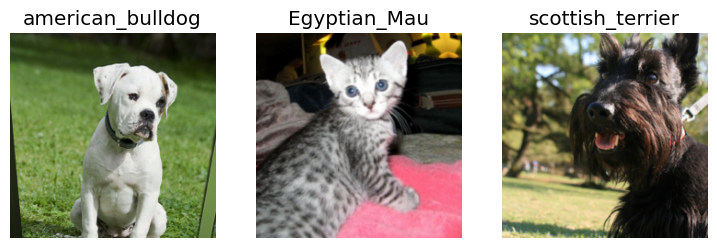

In [10]:
dls.show_batch(nrows=1, ncols=3)

In [13]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.516660,0.357854,0.115697,24:42


epoch,train_loss,valid_loss,error_rate,time
0,0.513969,0.372355,0.127876,27:20
1,0.313885,0.226421,0.071719,25:42


In [14]:
learn.export('pet_breed_model.pkl')